In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [8]:
log_path = Path(f"/home/ubuntu/repos/thesis/logs_g5_mixed")
MACHINE = "g5.4xlarge"
BATCH_SIZE = 128
DATASET = "cifar10"

#model_name = f"resnet18_bs_{BATCH_SIZE}"
model_name = f"resnet18_mixed_bs_{BATCH_SIZE}"

# Single training
train_path = log_path / "single_runs" / DATASET

# Shared data training
train_mul_path = log_path / "queues" / DATASET / model_name

naive_model_rn18_path_prefix = f"resnet18_pretrained_bs{BATCH_SIZE}_16tw_1vw_pid"
naive_model_rn34_path_prefix = f"resnet34_pretrained_bs{BATCH_SIZE}_16tw_1vw_pid"
naive_model_path_prefix = f"resnet50_pretrained_bs{BATCH_SIZE}_16tw_1vw_pid"
naive_model_8w_path_prefix = f"resnet50_pretrained_bs{BATCH_SIZE}_8tw_1vw_pid"
shared_model_path_prefix = f"resnet50_pretrained_bs{BATCH_SIZE}_16tw_1vw_1pf_pid"


In [9]:
if DATASET == "cifar10":
    pids = [
        4089, 5302, 6481, # naive seq
        7976, #7974, 7975, 7976, naive makespan
        10912, #10910, 10911, 10912, naive MPS
        14496, #14491, 14496, 14496 shared
        21028, #21020, 21025, 21028 shared MPS
    ]

    trace_pids = [
        4089, 7976, 10912, # naive
        14392, 20919, # shared

    ]

#if DATASET == "cifar10":
#    pids = [
#        3335, 4316, 5227,  #3335, 4316, 5227 naive sequential
#        2307, 2552, 3392,  #2307, 2552, 3392 naive sequential + DALI
#        6436,  #6434, 6435, 6436 naive makespan
#        3539,  #3537, 3538, 3539 naive makespan + DALI
#        8420,  #8418, 8419, 8420 naive MPS
#        3972,  #3970, 3971, 3972 naive MPS + DALI
#        10006, #10001, 10004, 10006 shared
#        4438,  #4436, 4437, 4438 shared + DALI
#        12105, #12096, 12102, 12105 shared MPS
#        4851,  #4849, 4850, 4851 shared MPS + DALI
#    ]
#
#    trace_pids = [
#        5227,
#        3392,
#        6436,
#        3539,
#        8420,
#        3972,
#        9903,
#        4384,
#        11995,
#        4797
#    ]
if DATASET == "imagenet_10pct":
    pids = [
        7994, #7992, 7993, 7994 naive makespan
        2074, #2072, 2073, 2074 naive MPS
        3341, #3336, 3339, 3341 shared
        5346 #5341, 5344, 5346 shared MPS
    ]
    trace_pids = [
        7994, 2074, 3248, 5257,
    ]

In [11]:
measurements = {}

naive_seq_1 = pd.read_csv(train_path / model_name / f"{naive_model_rn18_path_prefix}_{pids[0]}.csv")
naive_seq_2 = pd.read_csv(train_path / model_name / f"{naive_model_rn34_path_prefix}_{pids[1]}.csv")
naive_seq_3 = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[2]}.csv")
measurements["Naive sequential"] = naive_seq_1["total_time"].sum() + naive_seq_2["total_time"].sum() + naive_seq_3["total_time"].sum()

#naive_col = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[2]}.csv")
naive_col = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[3]}.csv")
measurements["Naive collocated\n(makespan/last finish time)"] = naive_col["total_time"].sum()

#naive_col_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[4]}.csv")
naive_col_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[4]}.csv")
measurements["Naive collocated (MPS)"] = naive_col_mps["total_time"].sum()

shared = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[5]}.csv")
measurements["Shared"] = shared["total_time"].sum()

shared_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[6]}.csv")
measurements["Shared MPS"] = shared_mps["total_time"].sum()

In [59]:
measurements = {}

if DATASET == "imagenet_10pct":
    naive = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[0]}.csv")
    measurements["Naive collocated\n(makespan/last finish time)"] = naive["total_time"].sum()

    naive_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[1]}.csv")
    measurements['Naive collocated (MPS)\nlast finish time'] = naive_mps["total_time"].sum()

    shared = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[2]}.csv")
    measurements["Shared"] = shared["total_time"].iloc[1] + shared["total_time"].iloc[-1]*9

    shared_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[3]}.csv")
    measurements["Shared MPS"] = shared_mps["total_time"].iloc[1] + shared_mps["total_time"].iloc[-1]*9

if DATASET == "cifar10":
    naive_seq_1 = pd.read_csv(train_path / model_name / f"{naive_model_rn18_path_prefix}_{pids[0]}.csv")
    naive_seq_2 = pd.read_csv(train_path / model_name / f"{naive_model_rn34_path_prefix}_{pids[1]}.csv")
    naive_seq_3 = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[2]}.csv")
    measurements["Naive sequential"] = naive_seq_1["total_time"].sum() + naive_seq_2["total_time"].sum() + naive_seq_3["total_time"].sum()

    naive_seq_dali_1 = pd.read_csv(train_path / model_name / f"{naive_model_rn18_path_prefix}_{pids[3]}.csv")
    naive_seq_dali_2 = pd.read_csv(train_path / model_name / f"{naive_model_rn34_path_prefix}_{pids[4]}.csv")
    naive_seq_dali_3 = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[5]}.csv")
    measurements["Naive sequential + DALI"] = naive_seq_dali_1["total_time"].sum() + naive_seq_dali_2["total_time"].sum() + naive_seq_dali_3["total_time"].sum()

    #naive_col = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[2]}.csv")
    naive_col = pd.read_csv(train_path / model_name / f"{naive_model_8w_path_prefix}_{pids[6]}.csv")
    measurements["Naive collocated\n(makespan/last finish time)"] = naive_col["total_time"].sum()

    naive_col_dali = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[7]}.csv")
    measurements["Naive collocated + DALI"] = naive_col_dali["total_time"].sum()

    #naive_col_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[4]}.csv")
    naive_col_mps = pd.read_csv(train_path / model_name / f"{naive_model_8w_path_prefix}_{pids[8]}.csv")
    measurements["Naive collocated (MPS)"] = naive_col_mps["total_time"].sum()

    naive_col_mps_dali = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[9]}.csv")
    measurements["Naive MPS + DALI"] = naive_col_mps_dali["total_time"].sum()

    shared = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[10]}.csv")
    measurements["Shared"] = shared["total_time"].sum()

    shared_dali = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[11]}.csv")
    measurements["Shared + DALI"] = shared_dali["total_time"].sum()

    shared_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[12]}.csv")
    measurements["Shared MPS"] = shared_mps["total_time"].sum()

    shared_mps_dali = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[13]}.csv")
    measurements["Shared MPS + DALI"] = shared_mps_dali["total_time"].sum()

    

In [12]:
measurements.items()

dict_items([('Naive sequential', 560.3423099517822), ('Naive collocated\n(makespan/last finish time)', 398.40346932411194), ('Naive collocated (MPS)', 314.5359547138214), ('Shared', 409.8890175819397), ('Shared MPS', 309.57506251335144)])

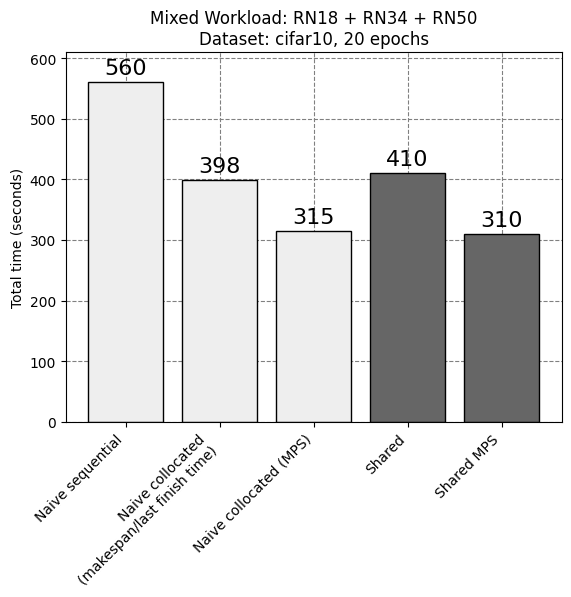

In [16]:
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)


colors = ['#eeeeee', '#eeeeee', '#eeeeee', '#666666', '#666666']
#hatches = ["/", "/", "///", "/", "///"]
(y_values,x_values) = zip(*measurements.items())
bars = plt.bar(y_values, x_values, color=colors, edgecolor="black")
plt.bar_label(bars, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
#plt.xlabel('Collocation Method')
plt.ylabel('Total time (seconds)')
plt.title('Mixed Workload: RN18 + RN34 + RN50\nDataset: cifar10, 20 epochs')
plt.xticks(rotation=45, ha="right")
plt.ylim(0,610)
plt.grid(color='gray', linestyle='dashed')
plt.show()


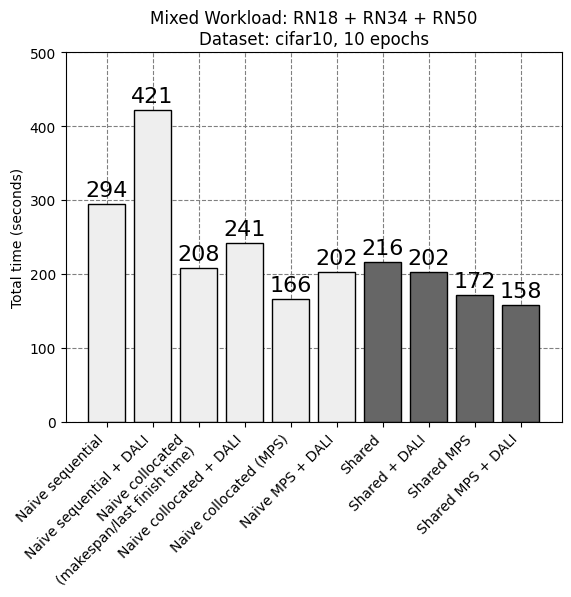

In [52]:
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)


colors = ['#eeeeee', '#eeeeee', '#eeeeee', '#eeeeee', '#eeeeee', '#eeeeee', '#666666', '#666666', '#666666', '#666666']
#hatches = ["/", "/", "///", "/", "///"]
(y_values,x_values) = zip(*measurements.items())
bars = plt.bar(y_values, x_values, color=colors, edgecolor="black")
plt.bar_label(bars, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
#plt.xlabel('Collocation Method')
plt.ylabel('Total time (seconds)')
plt.title('Mixed Workload: RN18 + RN34 + RN50\nDataset: cifar10, 10 epochs')
plt.xticks(rotation=45, ha="right")
plt.ylim(0,500)
plt.grid(color='gray', linestyle='dashed')
plt.show()


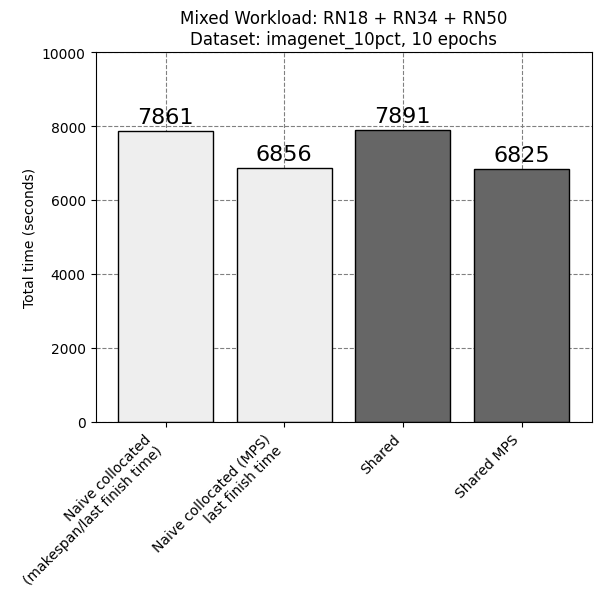

In [60]:
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)


colors = ['#eeeeee', '#eeeeee', '#666666', '#666666']
#hatches = ["/", "/", "///", "/", "///"]
(y_values,x_values) = zip(*measurements.items())
bars = plt.bar(y_values, x_values, color=colors, edgecolor="black")
plt.bar_label(bars, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
#plt.xlabel('Collocation Method')
plt.ylabel('Total time (seconds)')
plt.title('Mixed Workload: RN18 + RN34 + RN50\nDataset: imagenet_10pct, 10 epochs')
plt.xticks(rotation=45, ha="right")
plt.ylim(0,10000)
plt.grid(color='gray', linestyle='dashed')
plt.show()


In [ ]:
plt.rc('axes', axisbelow=True)

x_labels = ['Naive collocated\n(makespan/last finish time)',
            'Naive collocated (MPS)\nlast finish time', 
            'Shared', 
            'Shared MPS',
            ]
#y_values = [2363.55, 2059.36, 2370.83, 2056.42]
y_values=[0, 876.67+873.45+873.85+872.67+786.26+615.83+615.19+565.18+388.32+388.46, 801.77+(784.59*10), 697.38+(679.56*10)]
colors = ['#eeeeee', '#eeeeee', '#666666', '#666666']
#hatches = ["/", "/", "///", "/", "///"]

bars = plt.bar(x_labels, y_values, color=colors, edgecolor="black")
plt.bar_label(bars, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
#plt.xlabel('Collocation Method')
plt.ylabel('Total time (seconds)')
plt.title('Mixed Workload: RN18 + RN34 + RN50\nDataset: imagenet_10pct, 10 epochs')
plt.xticks(rotation=45, ha="right")
plt.ylim(0,10000)
plt.grid(color='gray', linestyle='dashed')
plt.show()
